## Импорт библиотек
Примечание 1: Используйте язык программирования Python для решения этой задачи.

Примечание 2: Используйте встроенные функции библиотек pandas, numpy, seaborn и scipy для выполнения этого задания.

Примечание 3: Сгенерированные данные должны быть достаточными для анализа в разрезе месяцев и годов. С учетом этого вам потребуется изменить генерацию данных так, чтобы они охватывали несколько месяцев или лет.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

users_col = 1200
np.random.seed(0)

1. Сгенерируйте искусственные данные для этого A/B-теста.

In [4]:
control_group=pd.DataFrame({'user_id':np.arange(users_col),
    'group': 'A',
    'conversion': np.random.choice([0, 1], size=users_col, p=[0.5, 0.5])})
np.random.seed(1)  # чтобы получить одинаковые результаты
test_group = pd.DataFrame({
    'user_id': np.arange(users_col, 2 * users_col),
    'group': 'B',
    'conversion': np.random.choice([0, 1], size=users_col, p=[0.45, 0.55])  })
ab_test_data = pd.concat([control_group, test_group], ignore_index=True)
ab_test_data

,user_id,group,conversion
0,0,A,1
1,1,A,1
2,2,A,1
3,3,A,1
4,4,A,0
...,...,...,...
2395,2395,B,1
2396,2396,B,0
2397,2397,B,0
2398,2398,B,1


2. Проведите бутстрап-анализ для оценки различий в средних коэффициентах конверсии между двумя группами.

In [10]:
def bootstrap_means(data, n_bootstrap_samples=12000):
    bootstrap_sample_means = []
    for _ in range(n_bootstrap_samples):
        bootstrap_sample=np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(bootstrap_sample.mean())
    return bootstrap_sample_means
      
bootstrap_means_A=bootstrap_means(ab_test_data[ab_test_data['group']=='A']['conversion'])
bootstrap_means_B=bootstrap_means(ab_test_data[ab_test_data['group']=='B']['conversion'])



3. Проведите тест Хи-квадрат для оценки значимости различий в коэффициентах конверсии между двумя группами.

In [11]:
contingency_table = pd.crosstab(ab_test_data['group'], ab_test_data['conversion'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

4. Сгенерируйте искусственные метки времени для каждого пользователя, распределенные равномерно в течение 2023 года.

In [44]:
# Добавляем искусственные метки времени
ab_test_data['timestamp'] = pd.date_range(start='1/1/2023', periods=len(ab_test_data), freq='D')

5. Сгенерируйте искусственные признаки «месяц» и «год» на основе этих меток времени.

In [41]:
ab_test_data['month'] = ab_test_data['timestamp'].dt.month
ab_test_data['year'] = ab_test_data['timestamp'].dt.year

6. Постройте графики, показывающие изменение средних коэффициентов конверсии в течение года по месяцам и для всего года.

C:\Users\molot\AppData\Local\Temp\ipykernel_1524\3858383021.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="mako", ax=ax[0])


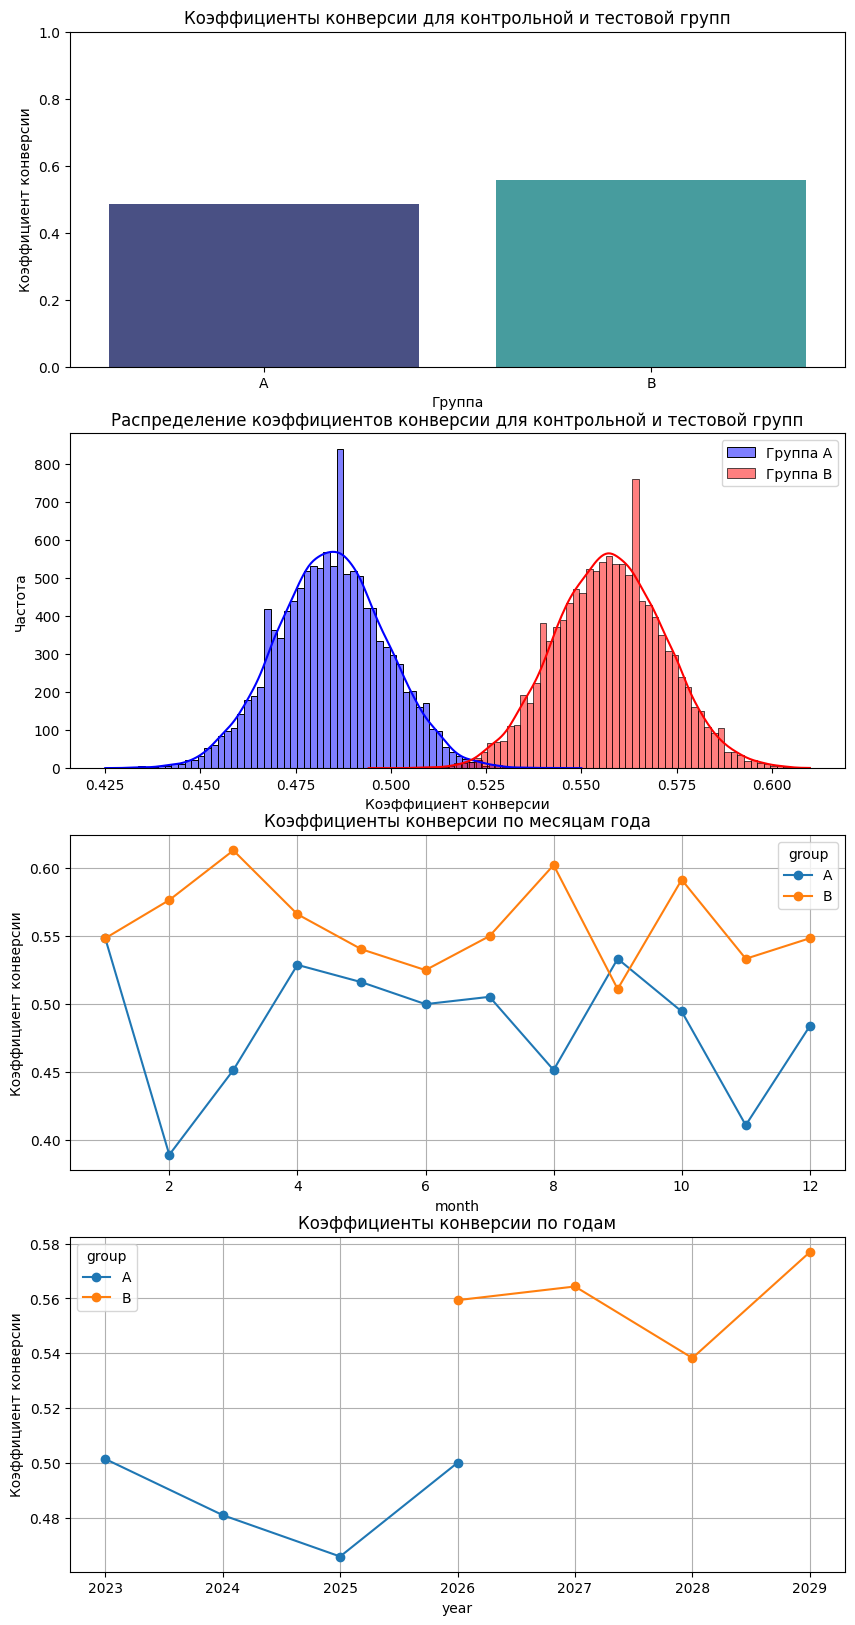

In [42]:
conversion_by_month = ab_test_data.groupby(['month', 'group'])['conversion'].mean().unstack()
conversion_by_year = ab_test_data.groupby(['year', 'group'])['conversion'].mean().unstack()

# Строим графики
fig, ax = plt.subplots(4, 1, figsize=(10, 20))

# Коэффициенты конверсии для контрольной и тестовой групп
conversion_rates = ab_test_data.groupby('group')['conversion'].mean()
sns.barplot(x=conversion_rates.index, y=conversion_rates.values, palette="mako", ax=ax[0])
ax[0].set_title('Коэффициенты конверсии для контрольной и тестовой групп')
ax[0].set_ylabel('Коэффициент конверсии')
ax[0].set_xlabel('Группа')
ax[0].set_ylim(0,1)

# Распределение коэффициентов конверсии для контрольной и тестовой групп
sns.histplot(bootstrap_means_A, color='b', kde=True, label='Группа A', ax=ax[1])
sns.histplot(bootstrap_means_B, color='r', kde=True, label='Группа B', ax=ax[1])
ax[1].set_title('Распределение коэффициентов конверсии для контрольной и тестовой групп')
ax[1].set_ylabel('Частота')
ax[1].set_xlabel('Коэффициент конверсии')
ax[1].legend()

conversion_by_month.plot(kind='line', marker='o', ax=ax[2])
ax[2].set_title('Коэффициенты конверсии по месяцам года')
ax[2].set_ylabel('Коэффициент конверсии')
ax[2].grid(True)

conversion_by_year.plot(kind='line', marker='o', ax=ax[3])
ax[3].set_title('Коэффициенты конверсии по годам')
ax[3].set_ylabel('Коэффициент конверсии')
ax[3].grid(True)


7. Напишите вывод по результатам эксперимента.

In [45]:
print("\nРезультаты теста Хи-квадрат:")
print(f"Статистика Хи-квадрат = {chi2}")
print(f"p-значение = {p_value}")



Результаты теста Хи-квадрат:
Статистика Хи-квадрат = 12.636939130434783
p-значение = 0.00037819870499904336


Тест дизайна на группе B показал лучшие результаты по сравнению с тестированием на группе А. Конверсия группы B больше, чем конверсия группы А.
Можно сделать вывод, что введение нового дизайна сайта более эффективен, чем старый дизайн сайта